In [ ]:
from mysql.connector import Connect
# Connection parameters
config = {
    "host": "",
    "port": ,
    "user": "",
    "password": "",
    "database": ""
}

# Connection Objection
# Stores all necessary info
# and drivers to connect to DB
CONN = Connect(**config)

# Cursor Object
# Required to execute SQL Queries
CURSOR = CONN.cursor()

In [ ]:
CURSOR.execute("SHOW TABLES;")

for item in CURSOR.fetchall():
    print(item)

In [4]:
def runQuery(query):
    CURSOR.execute(query)
    return list(CURSOR.fetchall())

In [ ]:
#query to get Sales register>Location>For specific location > customer wise
query = """
SELECT customer.customer_code AS customer_code,customer.trade_name AS customer_name,SUM(invoices.sub_total_amt - invoices.totalDiscount) AS base_amount,SUM(invoices.igst) AS igst,SUM(invoices.sgst) AS sgst,SUM(invoices.cgst) AS cgst,SUM(invoices.all_total_amt) AS total_amount,SUM(invoices.due_amount) AS receivable_amount FROM erp_branch_sales_order_invoices AS invoices LEFT JOIN erp_customer AS customer ON invoices.customer_id=customer.customer_id WHERE invoices.company_id=1 AND invoices.branch_id=1 AND invoices.location_id=8 AND invoices.invoice_date BETWEEN '2022-04-01' AND '2023-03-31' AND invoices.status='active' GROUP BY customer_code,customer_name;
"""

print(runQuery(query))

In [6]:
import pandas as pd

df = pd.read_sql_query(query, CONN)
df.head(15)

C:\Users\KASHIF ALI\AppData\Local\Temp\ipykernel_21368\3993396531.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, CONN)


,customer_code,customer_name,base_amount,igst,sgst,cgst,total_amount,receivable_amount
0,None,None,1508700.0,181044.00,45261.00,45261.00,1780266.00,1780266.00
1,51221103,Tata Consultancy Services Ltd,512982.0,95509.62,2802.60,2802.60,664096.82,324358.20
2,51221105,ACCENTURE SOLUTIONS PRIVATE LIMITED,2610.0,469.80,0.00,0.00,3079.80,3079.80
3,51221106,A.B.C LIMITED,2730.0,523.80,0.00,0.00,3433.80,1933.80
4,51221201,HAPPIEST MINDS TECHNOLOGIES LIMITED,70994.0,18899.64,0.00,0.00,139897.64,130499.64
5,51230101,Flipkart India Pvt Ltd.,553100.0,131958.00,0.00,0.00,868058.00,748024.00
6,51230102,TRACK FOUR INFOTEC (I) PRIVATE LIMITED,21200.0,0.00,1728.00,1728.00,27656.00,26656.00
7,51230103,AMAZON SELLER SERVICES PRIVATE LIMITED,501300.0,90054.00,0.00,0.00,591354.00,591354.00
8,51230201,ENCODERS TECHNOLOGIES PRIVATE LIMITED,1564180.0,0.00,148924.26,148924.26,1963028.52,1963028.52
9,51230302,Sheikh Salim Akhtar,19001000.0,3420180.00,0.00,0.00,22421180.00,22421180.00


In [12]:
df.shape

(12, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_code      11 non-null     object 
 1   customer_name      11 non-null     object 
 2   base_amount        12 non-null     float64
 3   igst               12 non-null     float64
 4   sgst               12 non-null     float64
 5   cgst               12 non-null     float64
 6   total_amount       12 non-null     float64
 7   receivable_amount  12 non-null     float64
dtypes: float64(6), object(2)
memory usage: 896.0+ bytes


In [13]:
df.describe()

,base_amount,igst,sgst,cgst,total_amount,receivable_amount
count,1.200000e+01,1.200000e+01,12.000000,12.000000,1.200000e+01,1.200000e+01
mean,2.580546e+06,3.285214e+05,70002.221667,70002.221667,3.086055e+06,3.041231e+06
std,5.548356e+06,9.756260e+05,185058.625508,185058.625508,6.537041e+06,6.548429e+06
min,2.610000e+03,0.000000e+00,0.000000,0.000000,3.079800e+03,1.933800e+03
25%,2.092500e+04,3.523500e+02,0.000000,0.000000,2.667150e+04,2.587200e+04
50%,5.071410e+05,1.125882e+04,0.000000,0.000000,6.277254e+05,4.578561e+05
75%,1.522570e+06,1.046217e+05,13417.200000,13417.200000,1.825957e+06,1.825957e+06
max,1.900100e+07,3.420180e+06,641310.800000,641310.800000,2.242118e+07,2.242118e+07


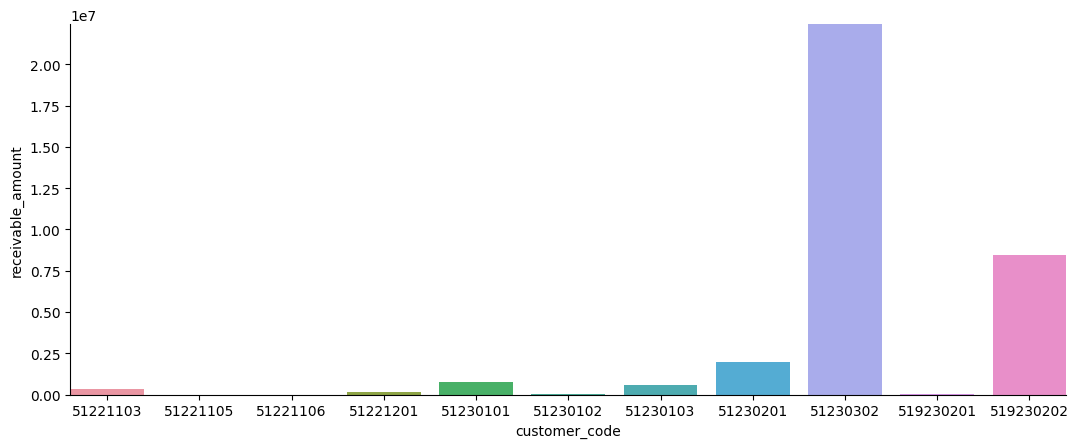

In [11]:
import seaborn as sns

visual=sns.catplot(data=df, kind="bar", x="customer_code", y="receivable_amount")

visual.figure.set_size_inches(12.5, 4.5)
visual.ax.margins(.00005)